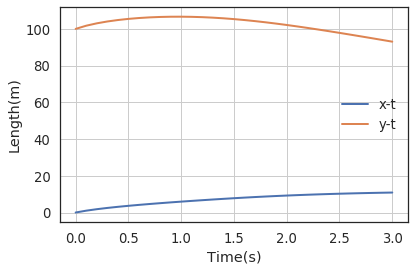

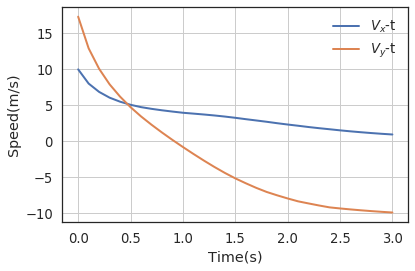

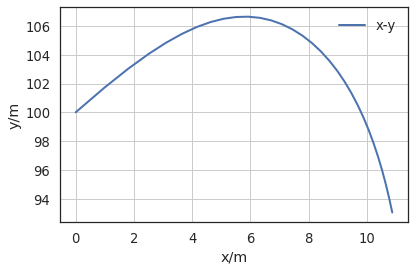

In [1]:
import OTM as otm
import numpy as np
a=otm.OTM(0,100,20,np.pi/3,0.1,3,0.1)
a.Show_xy_t()
a.Show_Vxy_t()
a.Show_position()